## Decision Tree 

<img src="DT.png">

In [ ]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files (x86)\Graphviz2.38\bin"
os.environ["PATH"]

<img src="../DT1Example.png">

In [1]:
import sklearn

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
iris.get("data").shape

(150, 4)

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y = iris.target

In [12]:
y = y.reshape((150, 1))

In [13]:
y.shape

(150, 1)

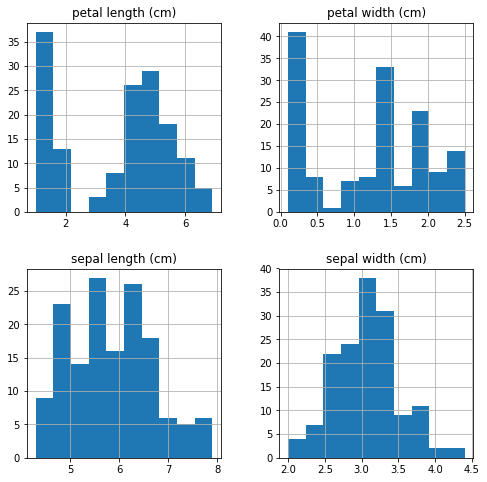

In [14]:
df.hist(figsize=(8, 8))
plt.show()

In [15]:
import seaborn as sns

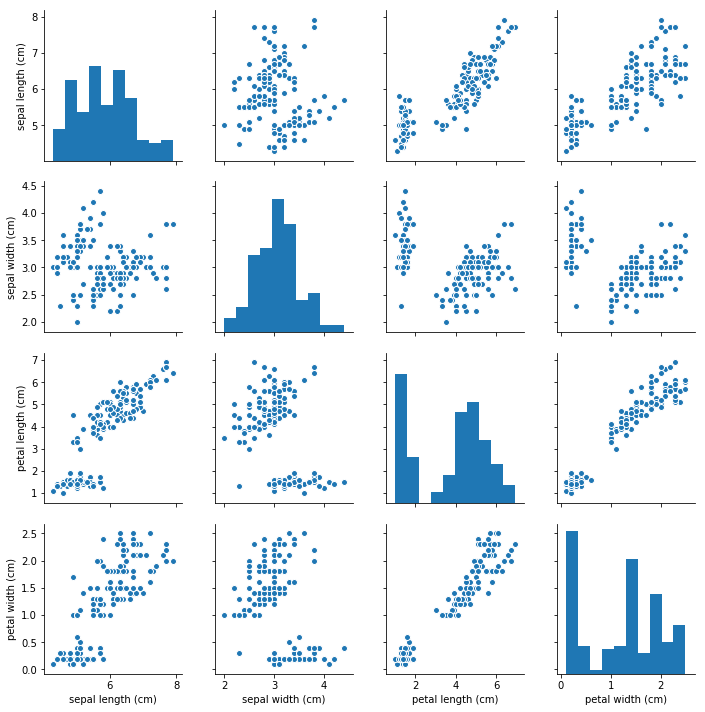

In [16]:
sns.pairplot(df)

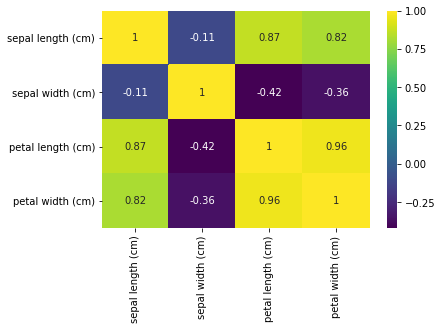

In [17]:
sns.heatmap(df.corr(), cmap="viridis", annot=True)

In [31]:
from sklearn.cross_validation import train_test_split

In [33]:
train_x, test_x, train_y, test_y = train_test_split(df,y, test_size=0.1)

In [35]:
train_x.shape, train_y.shape

((135, 4), (135, 1))

In [36]:
test_x.shape, test_y.shape

((15, 4), (15, 1))

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier()

In [37]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
#! pip install pydotplus

In [38]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [39]:
dot_data = StringIO()

In [40]:
export_graphviz(dt, out_file=dot_data,filled=True, 
                rounded=True, special_characters=True)

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

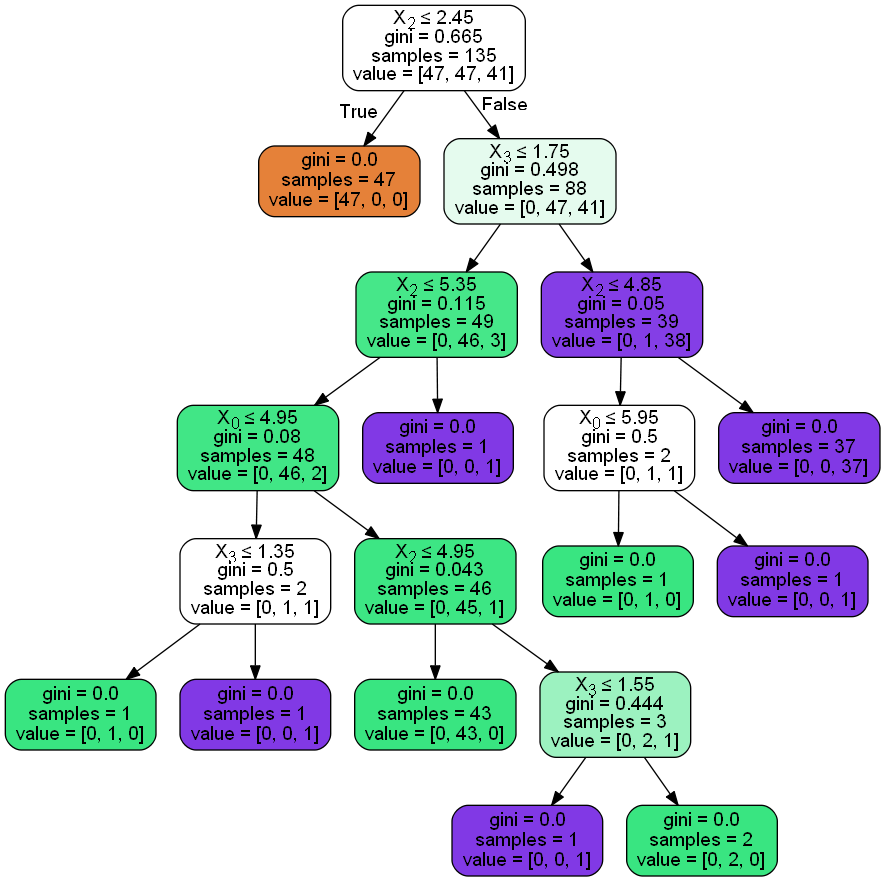

In [46]:
Image(graph.create_png())

<img src="../graph_viz.png">

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

In [48]:
pred_y = dt.predict(test_x)

In [52]:
confusion_matrix(test_y, pred_y)

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 9]], dtype=int64)

In [57]:
pred_y.shape, test_y.shape

((15,), (15, 1))

In [61]:
accuracy_score(test_y, pred_y)

1.0

In [62]:
dt.score(test_x, test_y)

1.0

((15, 1), (15,))

In [66]:
pred_y = pred_y.reshape((15, 1))

In [67]:
test_y.shape, pred_y.shape

((15, 1), (15, 1))

In [69]:
list(zip(test_y, pred_y))

[(array([2]), array([2])),
 (array([0]), array([0])),
 (array([1]), array([1])),
 (array([2]), array([2])),
 (array([0]), array([0])),
 (array([2]), array([2])),
 (array([1]), array([1])),
 (array([0]), array([0])),
 (array([2]), array([2])),
 (array([2]), array([2])),
 (array([2]), array([2])),
 (array([2]), array([2])),
 (array([2]), array([2])),
 (array([2]), array([2])),
 (array([1]), array([1]))]

In [73]:
(test_y == pred_y).mean()

1.0

In [79]:
for i,j in zip(train_x.columns, dt.feature_importances_):
    print(i, " - ",j)

sepal length (cm)  -  0.020894735709829443
sepal width (cm)  -  0.0
petal length (cm)  -  0.5499529240877843
petal width (cm)  -  0.42915234020238613


In [80]:
dt.feature_importances_.sum()

0.9999999999999999

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

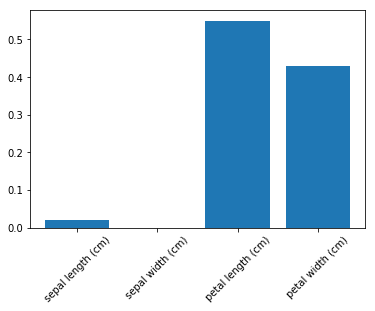

In [84]:
plt.bar(train_x.columns, dt.feature_importances_)
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x2885c850d30>,
 [Text(1.19742,0.0787147,'sepal length (cm)'),
  Text(1.18967,0.15709,'sepal width (cm)'),
  Text(-0.341092,1.1505,'petal length (cm)'),
  Text(0.26489,-1.1704,'petal width (cm)')])

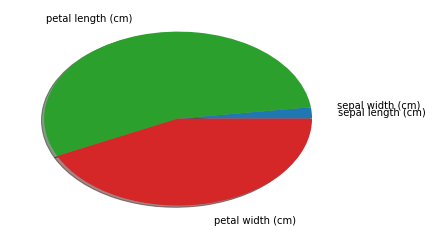

In [94]:
plt.pie(dt.feature_importances_, labels=train_x.columns,shadow=True, labeldistance=1.2)